Расчет молекулярной массы пектина косвенным методом по определению вязкости растворов с помощью вискозиметра Уббелоде

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.DataFrame(
    {
        'C': [0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5],
        'T1': [14.12, 16.82, 19.08, 21.65, 24.18, 26.06, 32.47, 41.11],
        'T2': [14.28, 16.77, 19.22, 21.68, 24.36, 26.15, 32.50, 41.09],
    }
)

data

,C,T1,T2
0,0.05,14.12,14.28
1,0.10,16.82,16.77
2,0.15,19.08,19.22
3,0.20,21.65,21.68
4,0.25,24.18,24.36
5,0.30,26.06,26.15
6,0.40,32.47,32.50
7,0.50,41.11,41.09


In [3]:
T_H2O = sum([10.83, 10.82, 11.07, 11.14, 11.13])/5
data['T'] = data[['T1', 'T2']].mean(axis=1)
data = data.drop(['T1', 'T2'], axis=1)

data['n_уд'] = (data['T']-T_H2O)/T_H2O

data['n_прив'] = data['n_уд']/data['C']

data['n_отн'] = data['T']/T_H2O

data['ln(n_отн)/C'] = np.log(data['n_отн'])/data['C']

data = data.round(2)

data

,C,T,n_уд,n_прив,n_отн,ln(n_отн)/C
0,0.05,14.20,0.29,5.82,1.29,5.11
1,0.10,16.80,0.53,5.27,1.53,4.23
2,0.15,19.15,0.74,4.94,1.74,3.70
3,0.20,21.66,0.97,4.85,1.97,3.39
4,0.25,24.27,1.21,4.83,2.21,3.17
5,0.30,26.10,1.37,4.58,2.37,2.88
6,0.40,32.48,1.95,4.88,2.95,2.71
7,0.50,41.10,2.74,5.47,3.74,2.64


Характеристическая вязкость = 5.24
R2 = 0.063


Text(-0.07, 5.2700000000000005, '[n]=5.24')

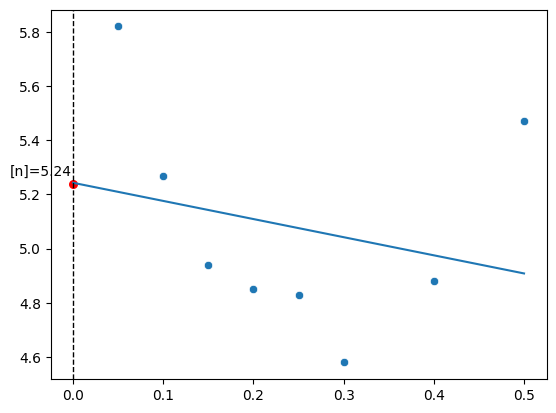

In [4]:
# from sklearn.preprocessing import PolynomialFeatures

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_прив'].to_numpy().reshape(-1, 1)

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)

X_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_pred_line = model.predict(X_line)

n = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n}')
print(f'R2 = {r2_score(y, y_pred):.3f}')

# X_line = np.linspace(0, 0.5, 100).reshape(-1, 1)
# X_line_poly = poly.fit_transform(X_line)
# y_pred_line = model.predict(X_line_poly)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n}', fontsize=10, color='black')

Характеристическая вязкость = 4.7
R2 = 0.807


(2.5, 5.5)

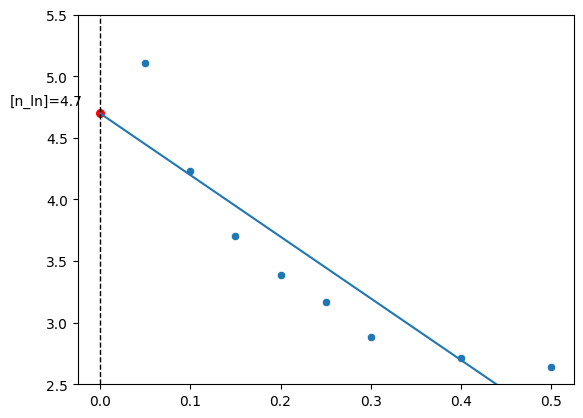

In [5]:
X = data['C'].to_numpy().reshape(-1, 1)
y_ln = data['ln(n_отн)/C'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y=y_ln)
y_ln_pred = model.predict(X)
X_ln_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_ln_pred_line = model.predict(X_ln_line)

n_ln = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n_ln}')
print(f'R2 = {r2_score(y_ln, y_ln_pred):.3f}')

sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln}', fontsize=10, color='black')
plt.ylim(2.5, 5.5)

[n] = 5.24 | Молекулярная масса = 45.09 кДа
[n_ln] = 4.7 | Молекулярная масса (ln) = 41.24 кДа

Таблица с данными:
      C      T  n_уд  n_прив  n_отн  ln(n_отн)/C
0  0.05  14.20  0.29    5.82   1.29         5.11
1  0.10  16.80  0.53    5.27   1.53         4.23
2  0.15  19.15  0.74    4.94   1.74         3.70
3  0.20  21.66  0.97    4.85   1.97         3.39
4  0.25  24.27  1.21    4.83   2.21         3.17
5  0.30  26.10  1.37    4.58   2.37         2.88
6  0.40  32.48  1.95    4.88   2.95         2.71
7  0.50  41.10  2.74    5.47   3.74         2.64


Text(-0.1, 4.7700000000000005, '[n_ln]=4.70')

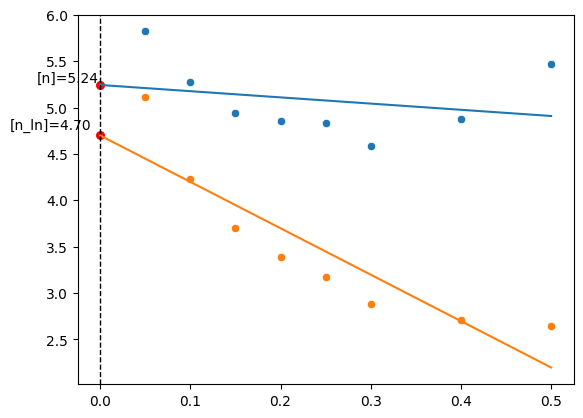

In [6]:
K = 1.1*10**(-5)
a = 1.22

MM = (n/K)**(1/1.22)/1000
print(f'[n] = {n} | Молекулярная масса = {MM:.2f} кДа')

MM_ln = (n_ln/K)**(1/1.22)/1000
print(f'[n_ln] = {n_ln} | Молекулярная масса (ln) = {MM_ln:.2f} кДа')

print(f'\nТаблица с данными:\n{data}')

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())
sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n:.2f}', fontsize=10, color='black')
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln:.2f}', fontsize=10, color='black')